In [49]:
!pip install opendatasets


In [50]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset')

Skipping, found downloaded files in "./heart-disease-dataset" (use force=True to force download)


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('/content/heart-disease-dataset/heart.csv')

In [53]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [55]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [56]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [57]:
df.duplicated().sum()

np.int64(723)

In [58]:
df.drop_duplicates(inplace=True)

In [59]:
df.duplicated().sum()

np.int64(0)

age


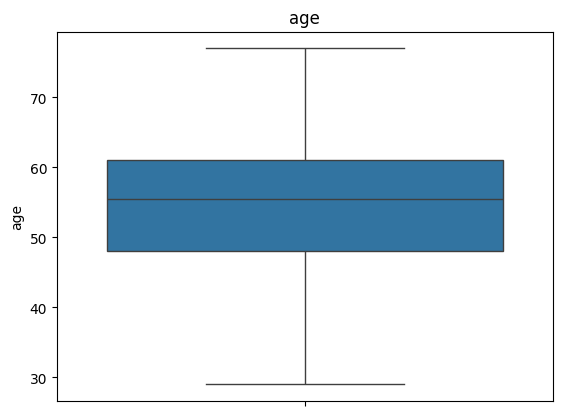

sex


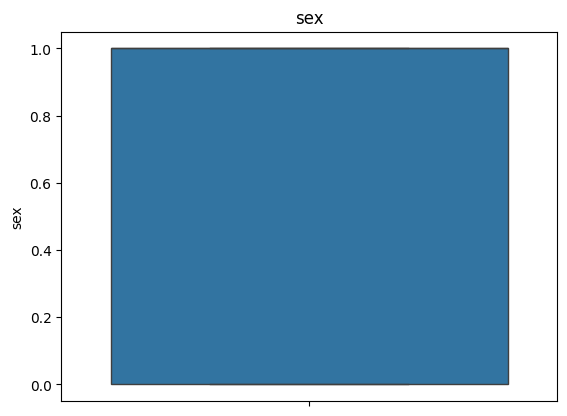

cp


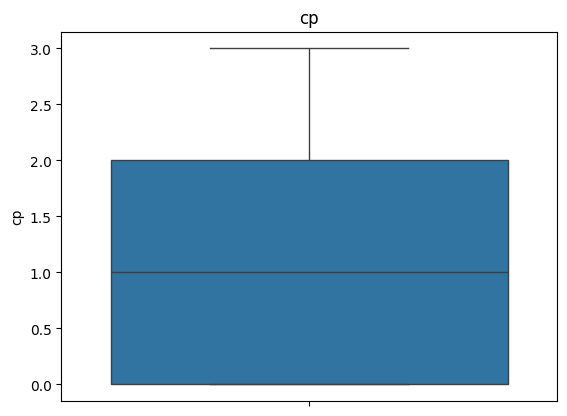

trestbps


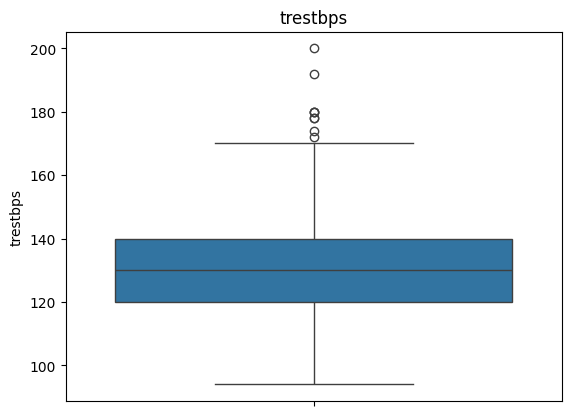

chol


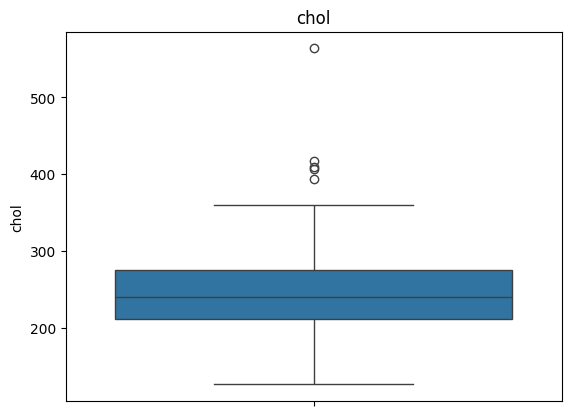

fbs


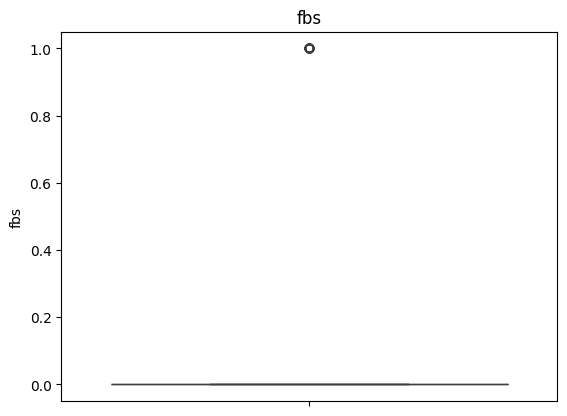

restecg


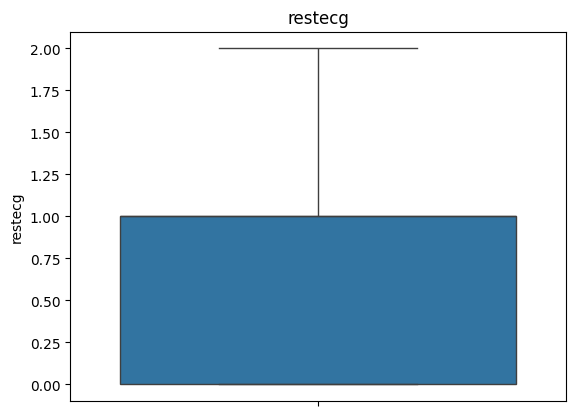

thalach


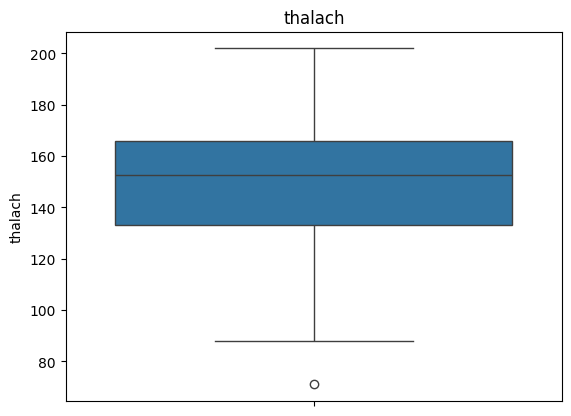

exang


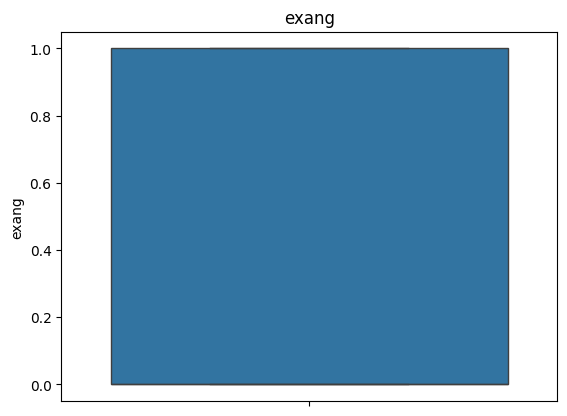

oldpeak


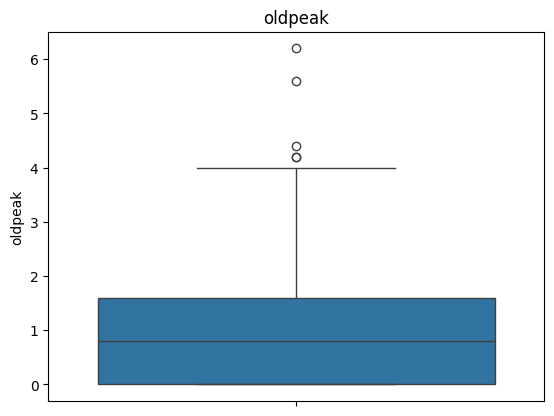

slope


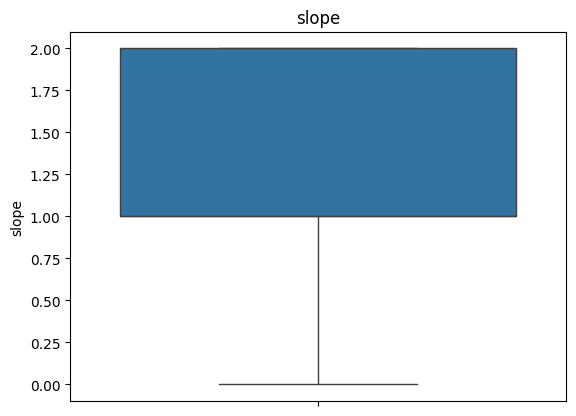

ca


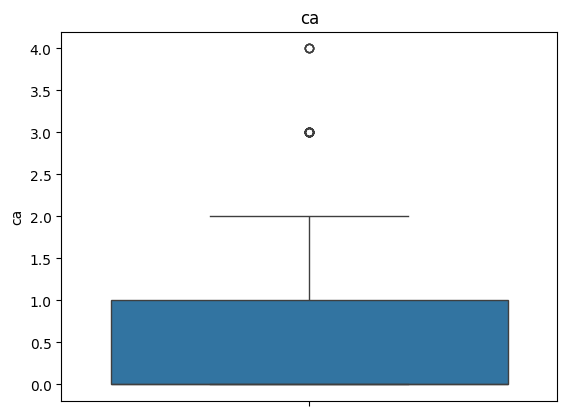

thal


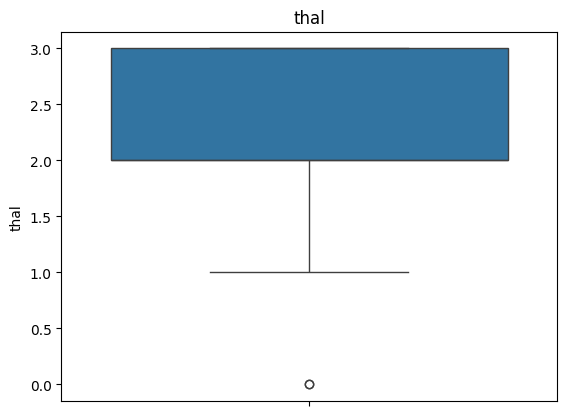

target


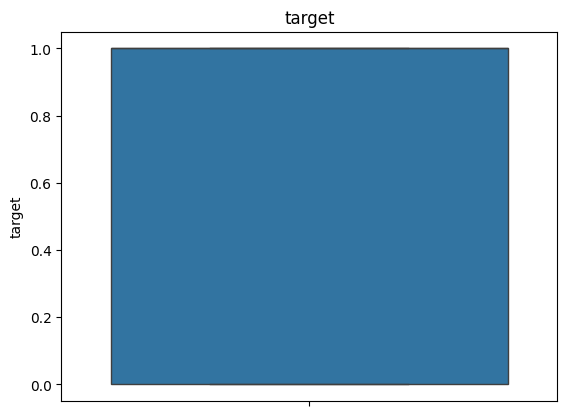

In [60]:
for col in df.columns:
  print(col)
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

age


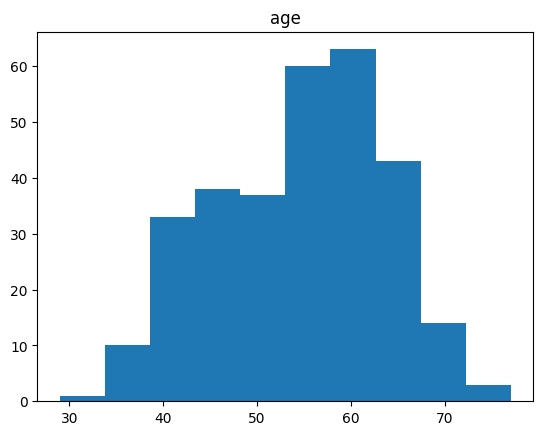

sex


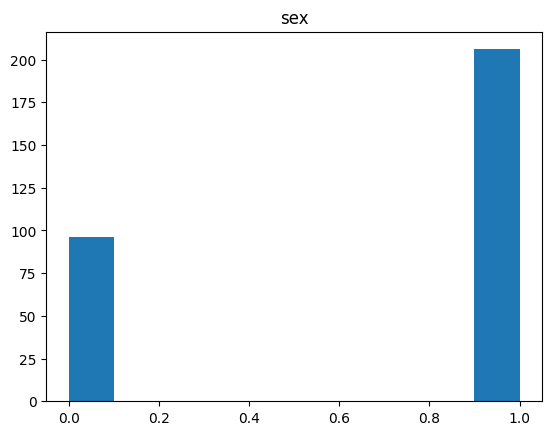

cp


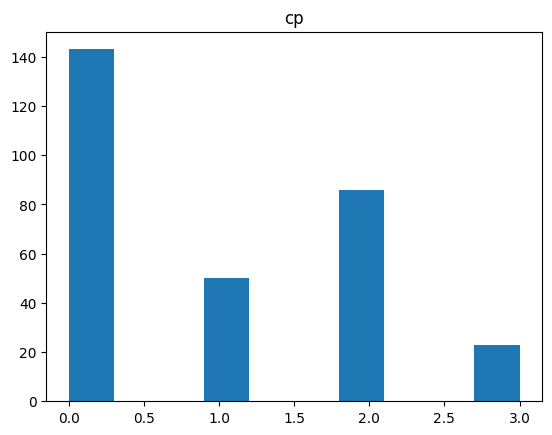

trestbps


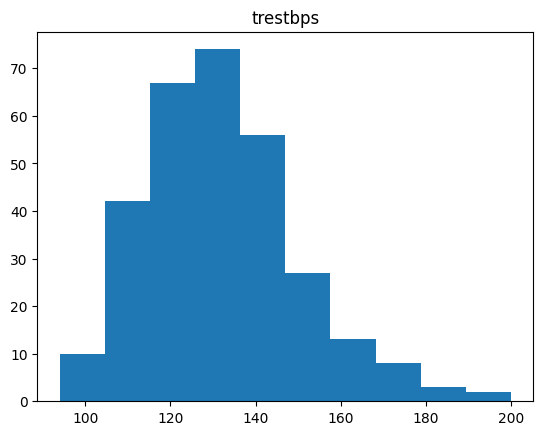

chol


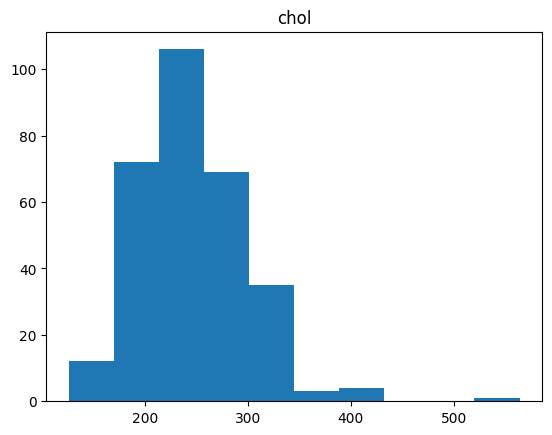

fbs


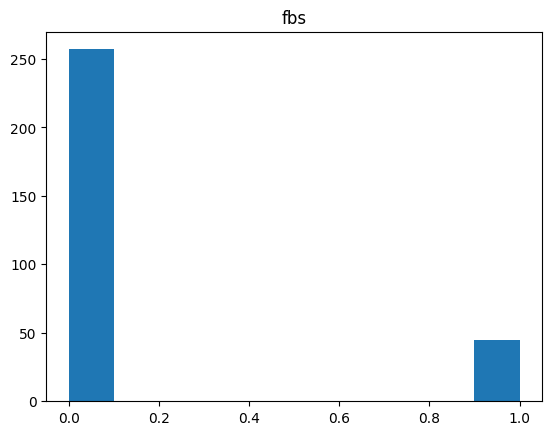

restecg


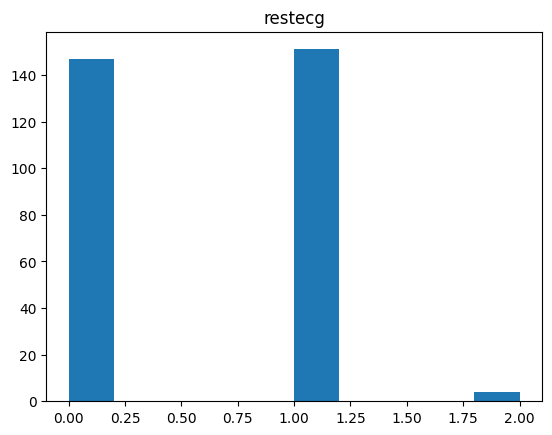

thalach


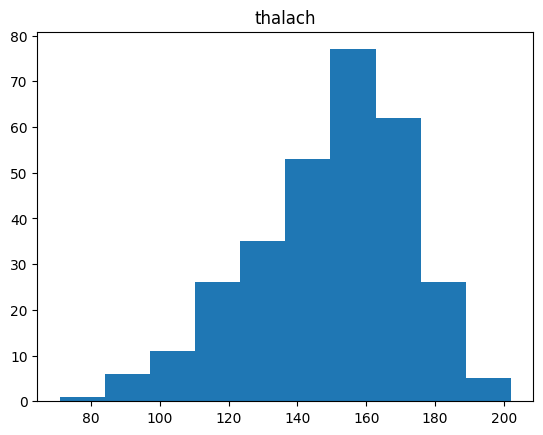

exang


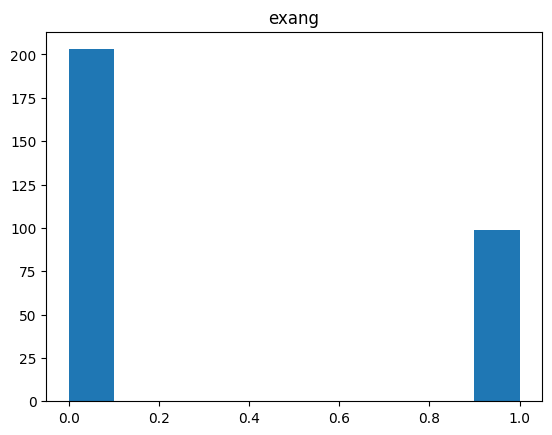

oldpeak


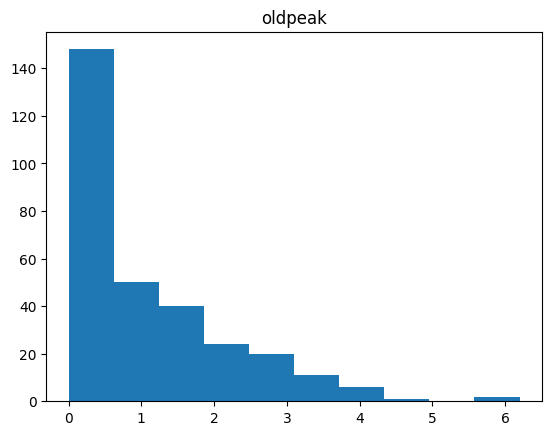

slope


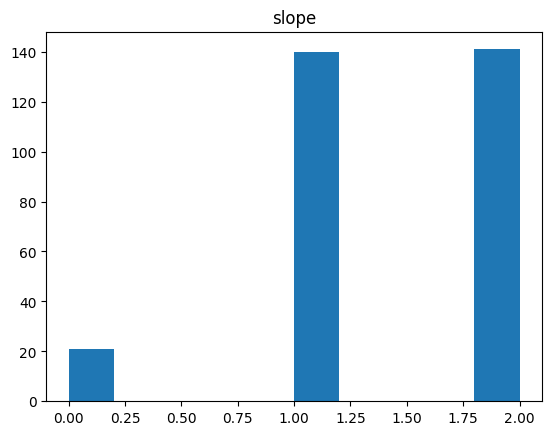

ca


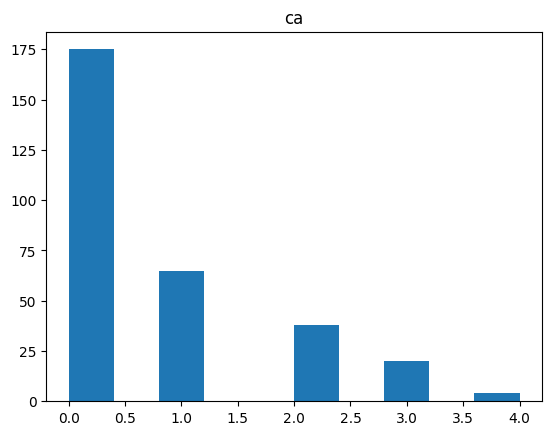

thal


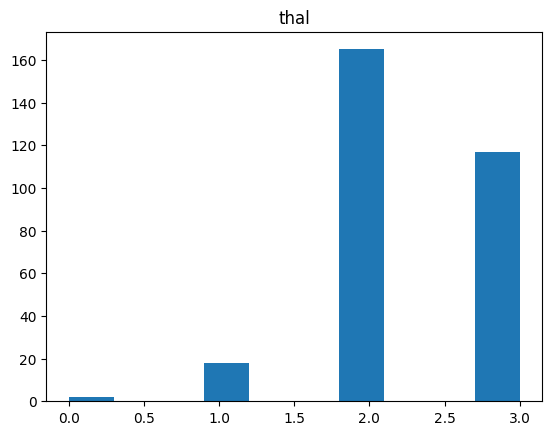

target


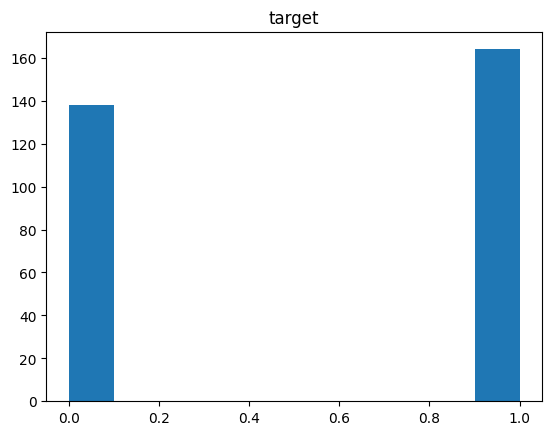

In [61]:
for col in df.columns:
  print(col)
  plt.hist(df[col])
  plt.title(col)
  plt.show()

In [62]:
# # Identify columns to transform (all except 'target')
# cols_to_transform = [col for col in df.columns if col != 'target']

# for col in cols_to_transform:
#   df[col] = np.log1p(df[col])

# # Now plot histograms for the transformed columns
# for col in cols_to_transform:
#   print(col)
#   plt.hist(df[col])
#   plt.title(col)
#   plt.show()

In [63]:
from scipy.stats import zscore
z_scores = zscore(df)
abs_z_scores = np.abs(z_scores)
for col in df.columns:
  print(col)
  outlier_rows = np.where(abs_z_scores > 3)
  print(outlier_rows)

age
(array([ 14,  49,  51,  63, 104, 108, 124, 128, 142, 144, 188, 212, 227,
       260, 269]), array([12, 11,  9,  9,  4, 11,  3,  4,  3,  4,  7, 12, 11,  4, 11]))
sex
(array([ 14,  49,  51,  63, 104, 108, 124, 128, 142, 144, 188, 212, 227,
       260, 269]), array([12, 11,  9,  9,  4, 11,  3,  4,  3,  4,  7, 12, 11,  4, 11]))
cp
(array([ 14,  49,  51,  63, 104, 108, 124, 128, 142, 144, 188, 212, 227,
       260, 269]), array([12, 11,  9,  9,  4, 11,  3,  4,  3,  4,  7, 12, 11,  4, 11]))
trestbps
(array([ 14,  49,  51,  63, 104, 108, 124, 128, 142, 144, 188, 212, 227,
       260, 269]), array([12, 11,  9,  9,  4, 11,  3,  4,  3,  4,  7, 12, 11,  4, 11]))
chol
(array([ 14,  49,  51,  63, 104, 108, 124, 128, 142, 144, 188, 212, 227,
       260, 269]), array([12, 11,  9,  9,  4, 11,  3,  4,  3,  4,  7, 12, 11,  4, 11]))
fbs
(array([ 14,  49,  51,  63, 104, 108, 124, 128, 142, 144, 188, 212, 227,
       260, 269]), array([12, 11,  9,  9,  4, 11,  3,  4,  3,  4,  7, 12, 11,  4, 11]))
reste

In [64]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df.reset_index(drop=True, inplace=True)
print(f"DataFrame shape after removing outliers: {df.shape}")

DataFrame shape after removing outliers: (228, 14)


<Axes: >

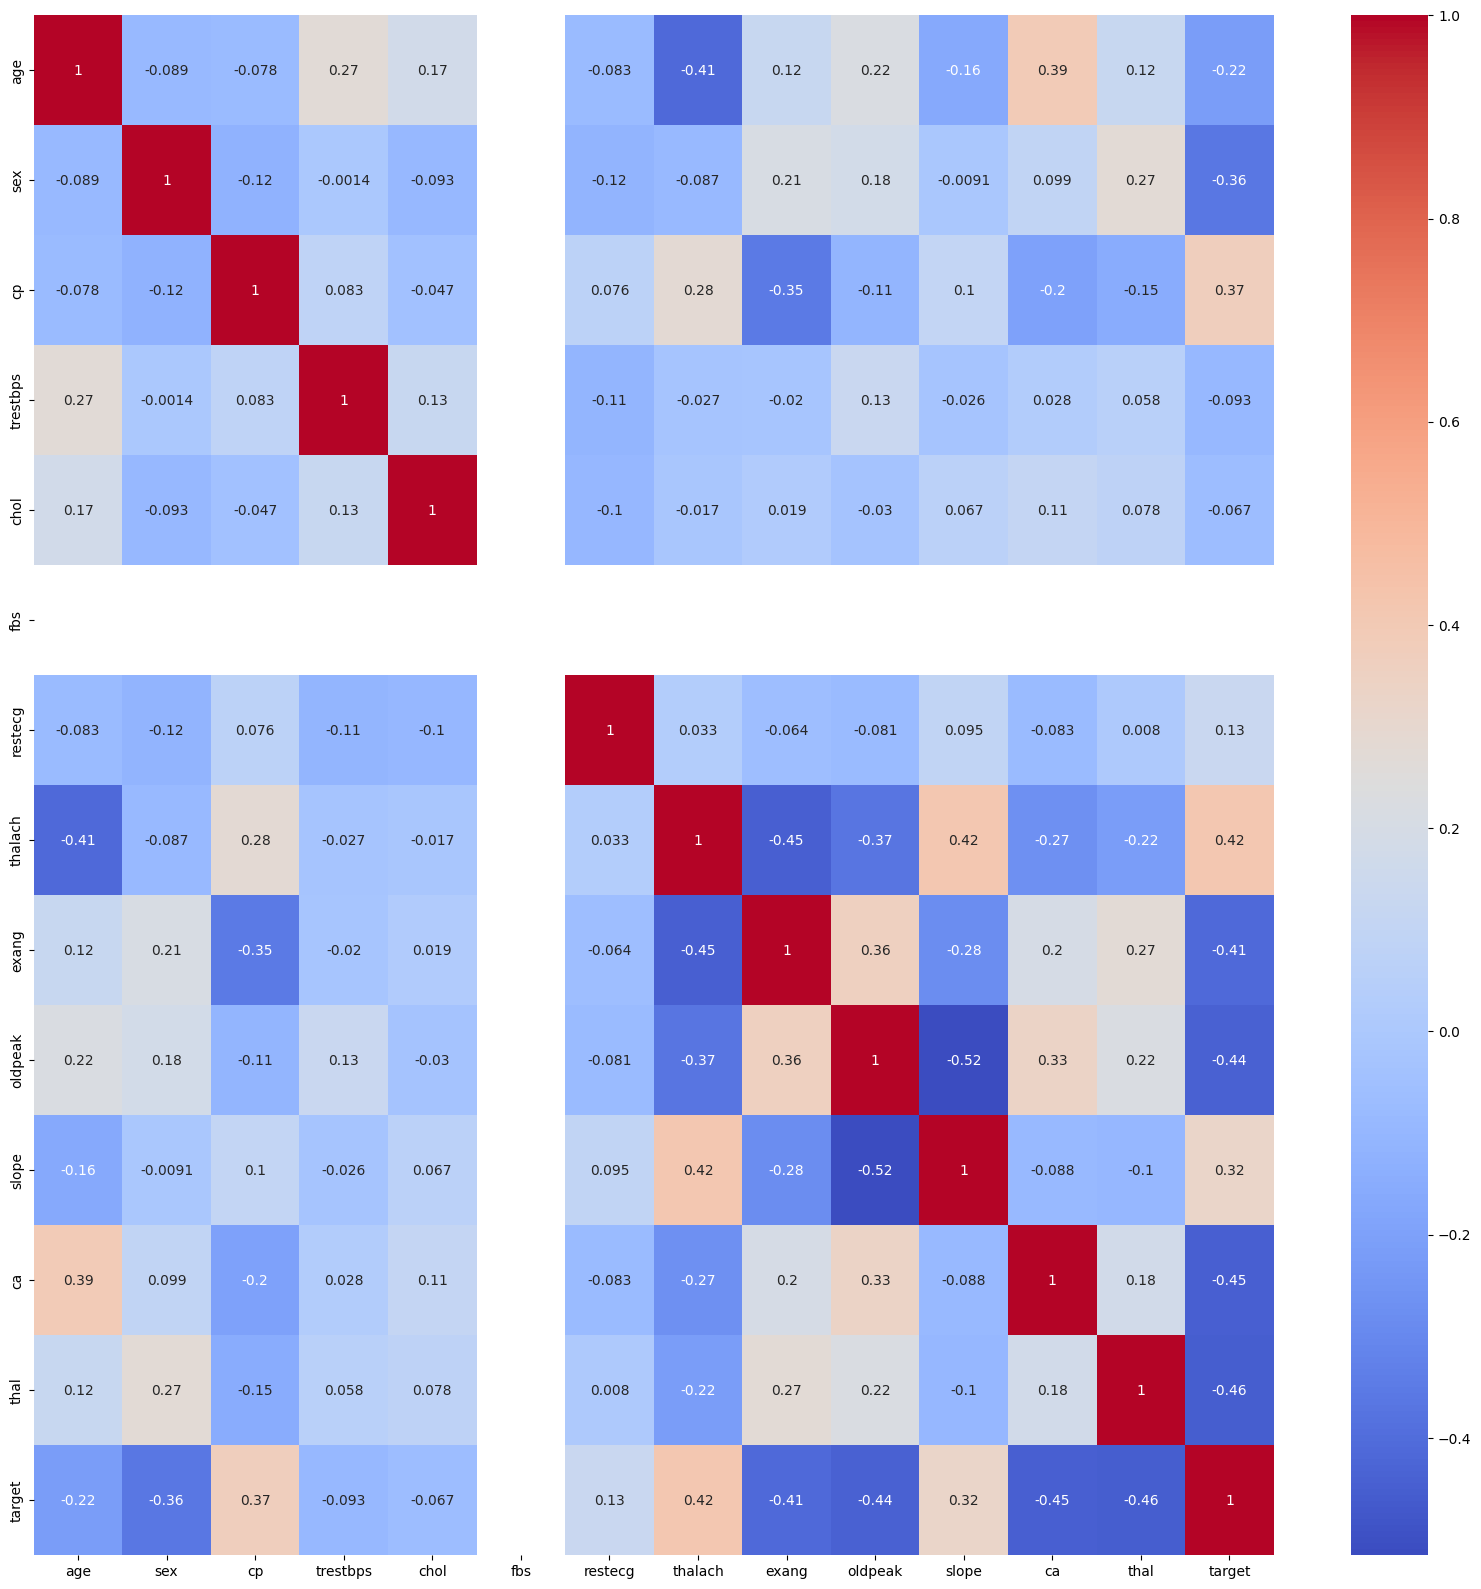

In [65]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [67]:
x = df.drop('target', axis=1)
y = df['target']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [69]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9130434782608695


In [71]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.94      0.94      0.94        31

    accuracy                           0.91        46
   macro avg       0.90      0.90      0.90        46
weighted avg       0.91      0.91      0.91        46



In [72]:
import joblib

joblib.dump(model, 'logistic_regression_model.joblib')
print("Model saved successfully as 'logistic_regression_model.joblib'")

Model saved successfully as 'logistic_regression_model.joblib'


In [73]:
import joblib
import pandas as pd
import numpy as np

def predict_heart_disease(input_data):

    # Load the trained model
    model = joblib.load('logistic_regression_model.joblib')

    columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


    input_df = pd.DataFrame([input_data], columns=columns)

    # Apply log transformation to the same columns as done during training
    cols_to_transform = ['chol', 'trestbps', 'oldpeak']
    for col in cols_to_transform:
        if col in input_df.columns:
            input_df[col] = np.log1p(input_df[col])

    prediction = model.predict(input_df)
    probability = model.predict_proba(input_df)


    if prediction[0] == 1:
        return f"Prediction: High risk of heart disease (Probability: {probability[0][1]:.2f})"
    else:
        return f"Prediction: Low risk of heart disease (Probability: {probability[0][0]:.2f})"

print("Prediction function 'predict_heart_disease' defined.")

Prediction function 'predict_heart_disease' defined.


In [77]:
print(predict_heart_disease(	[68,	0	,2,	120,	211,	0	,0,	115,	0,	1.5,	1	,0,	2]))

Prediction: High risk of heart disease (Probability: 0.99)
